## Semester 1 Project Submission

Please fill out:
* Student name: 
* Instructor name: 


In [1]:
# Your code here - remember to use markdown cells for comments as well!

Import all packages to be used

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Open dataframes

In [3]:
grossdf = pd.read_csv('../../zippedData/bom.movie_gross.csv.gz')
#grossdf.head(5)

In [5]:
ratingdf = pd.read_csv('../../zippedData/rt.movie_info.tsv.gz', sep='\t')
#ratingdf.head(5)

In [7]:
reviewdf = pd.read_csv('../../zippedData/rt.reviews.tsv.gz', sep='\t', encoding='iso-8859-1')
#reviewdf.head(5)

In [8]:
tmdbmoviesdf = pd.read_csv('../../zippedData/tmdb.movies.csv.gz')
#tmdbmoviesdf.head(5)

In [ ]:
#ratingdf['id'].unique

In [9]:
budgetdf = pd.read_csv('../../zippedData/tn.movie_budgets.csv.gz')
budgetdf.head(5)
#budgetdf.info()

#budgetdf['id'].unique

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [13]:
#ratingdf.info()

In [14]:
merged_df = pd.merge(ratingdf, budgetdf, on='id')
merged_df.drop_duplicates(subset='id', inplace=True)
merged_df.head(25)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
58,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
116,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
174,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
232,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
290,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000","Jul 11, 2000",NaN,NaN,95 minutes,Warner Bros. Pictures,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
348,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"
406,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics,"Jul 2, 2013",The Lone Ranger,"$275,000,000","$89,302,115","$260,002,115"
464,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010","Nov 9, 2010",$,"134,904",117 minutes,NaN,"Mar 9, 2012",John Carter,"$275,000,000","$73,058,679","$282,778,100"
522,15,When a diamond expedition in the Congo is lost...,PG-13,Action and Adventure|Mystery and Suspense|Scie...,Frank Marshall,John Patrick Shanley,"Jun 9, 1995","Jul 27, 1999",NaN,NaN,108 minutes,NaN,"Nov 24, 2010",Tangled,"$260,000,000","$200,821,936","$586,477,240"


In [15]:
#merged_df.info()

In [16]:
merged_df['worldwide_gross'] = merged_df['worldwide_gross'].replace('[\$,]', '', regex=True).astype("int64")

In [17]:
groupeddf = merged_df.groupby('genre')['worldwide_gross'].mean()

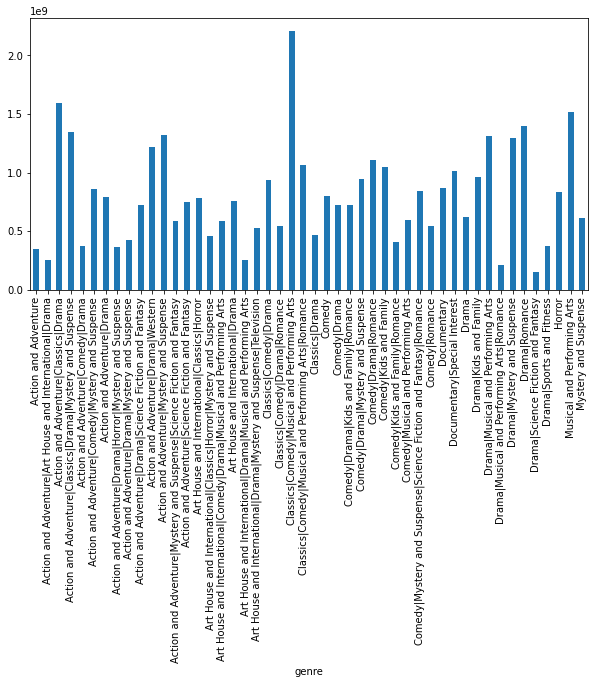

In [18]:
plt.figure(figsize=(10,5))
groupeddf.plot(kind='bar')
plt.show()

In [19]:
top_3 = groupeddf.nlargest(3)
top_3

genre
Classics|Comedy|Musical and Performing Arts    2.208208e+09
Action and Adventure|Classics|Drama            1.593674e+09
Musical and Performing Arts                    1.517936e+09
Name: worldwide_gross, dtype: float64

In [20]:
merged_df['runtime'] = runtime.str.replace(' minutes', '').astype('float64')

NameError: name 'runtime' is not defined

In [ ]:
merged_df.plot(kind='scatter', x='runtime', y='worldwide_gross')
plt.show()

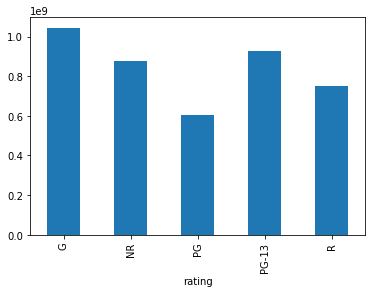

In [30]:
grouped_df1 = merged_df.groupby('rating')['worldwide_gross'].mean()

grouped_df1.plot(kind='bar')
plt.show()

In [ ]:
merged_df['production_budget'] = merged_df['production_budget'].replace('[\$,]', '', regex=True).astype("int64")

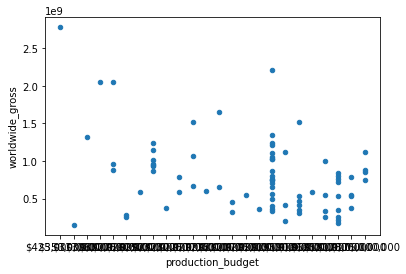

In [21]:
merged_df.plot(kind='scatter', x='production_budget', y='worldwide_gross')
plt.show()

In [22]:
import sqlite3

In [28]:
conn = sqlite3.connect('../../zippedData/im.db.zip')

In [29]:
df = pd.read_sql_query("SELECT * FROM movie_basics", conn)

df

DatabaseError: Execution failed on sql 'SELECT * FROM movie_basics': file is not a database

In [25]:
df.rename(columns={'original_title':'movie'}, inplace=True)

NameError: name 'df' is not defined

In [26]:
merged2 = pd.merge(df, budgetdf, on='movie')

NameError: name 'df' is not defined

In [27]:
merged2.head()

NameError: name 'merged2' is not defined

In [ ]:
merged2['production_budget'] = merged2['production_budget'].replace('[\$,]', '', regex=True).astype("int64")

In [ ]:
merged2['worldwide_gross'] = merged2['worldwide_gross'].replace('[\$,]', '', regex=True).astype("int64")

In [ ]:
merged2.head()